In [1]:
from binarytoydata import *
from model_training import *
%load_ext autoreload
import pandas as pd
import torch.distributions as dist
import torch
import pandas as pd
import numpy as np
import sklearn

In [2]:
x_expectations.shape[0]

NameError: name 'x_expectations' is not defined

In [164]:
%autoreload 2
num_samples = 10000
z_expectation = torch.Tensor([0.5])
x_expectations = torch.Tensor([[0.9,0.1]])#,
                              #[0.6,0.4]])
t_expectations = torch.Tensor([[0.6,0.2]])
y_expectations = torch.Tensor([[0.1,0.8,0.2,0.92]])
df = binary_data_df(num_samples, z_expectation, x_expectations, t_expectations, y_expectations)

torch.Size([10000, 1])


In [165]:
len(df[(df.z==0) & (df.t == 1)]) / len(df[df.z==0])

0.5945085555113411

In [166]:
BATCH_SIZE = 1000
device = 'cpu'
dataset = BinaryDataset(df)
dataloader = BinaryDataLoader(dataset, validation_split=0.2)
train_loader, test_loader = dataloader.get_loaders(batch_size=BATCH_SIZE)

Training Results - Epoch 1 - PEHE: 0.7439 MAE ATE: -0.7069 y_reconc_loss: 647.0871 x_reconc_loss: 744.3872 t_reconc_loss: 660.0364 kld_loss: 21.5031 total_loss: 2073.0138 learning rate: 0.0089
Validate Results - Epoch 1 - PEHE: 0.7450 MAE ATE: -0.6970 y_reconc_loss: 645.9557 x_reconc_loss: 744.2511 t_reconc_loss: 658.0523 kld_loss: 21.5539 total_loss: 2069.8131 learning rate: 0.0089
Training Results - Epoch 2 - PEHE: 0.7439 MAE ATE: -0.7069 y_reconc_loss: 600.9097 x_reconc_loss: 727.5400 t_reconc_loss: 644.7618 kld_loss: 31.4215 total_loss: 2004.6330 learning rate: 0.0079
Validate Results - Epoch 2 - PEHE: 0.7450 MAE ATE: -0.6970 y_reconc_loss: 597.4547 x_reconc_loss: 721.1229 t_reconc_loss: 639.3968 kld_loss: 31.3624 total_loss: 1989.3368 learning rate: 0.0079
Training Results - Epoch 3 - PEHE: 0.7439 MAE ATE: -0.7069 y_reconc_loss: 569.2453 x_reconc_loss: 716.8350 t_reconc_loss: 638.7855 kld_loss: 30.7020 total_loss: 1955.5679 learning rate: 0.0071
Validate Results - Epoch 3 - PEHE: 

Training Results - Epoch 23 - PEHE: 0.7439 MAE ATE: -0.7069 y_reconc_loss: 468.3922 x_reconc_loss: 691.2622 t_reconc_loss: 632.4055 kld_loss: 33.8115 total_loss: 1825.8715 learning rate: 0.0007
Validate Results - Epoch 23 - PEHE: 0.7450 MAE ATE: -0.6970 y_reconc_loss: 461.6511 x_reconc_loss: 691.8590 t_reconc_loss: 633.0474 kld_loss: 33.8886 total_loss: 1820.4462 learning rate: 0.0007
Training Results - Epoch 24 - PEHE: 0.7439 MAE ATE: -0.7069 y_reconc_loss: 468.1789 x_reconc_loss: 691.8567 t_reconc_loss: 637.7922 kld_loss: 34.1284 total_loss: 1831.9562 learning rate: 0.0006
Validate Results - Epoch 24 - PEHE: 0.7450 MAE ATE: -0.6970 y_reconc_loss: 460.7176 x_reconc_loss: 689.6567 t_reconc_loss: 632.7258 kld_loss: 34.2127 total_loss: 1817.3128 learning rate: 0.0006
Training Results - Epoch 25 - PEHE: 0.7439 MAE ATE: -0.7069 y_reconc_loss: 466.4090 x_reconc_loss: 691.3969 t_reconc_loss: 631.1023 kld_loss: 34.3642 total_loss: 1823.2724 learning rate: 0.0006
Validate Results - Epoch 25 - 

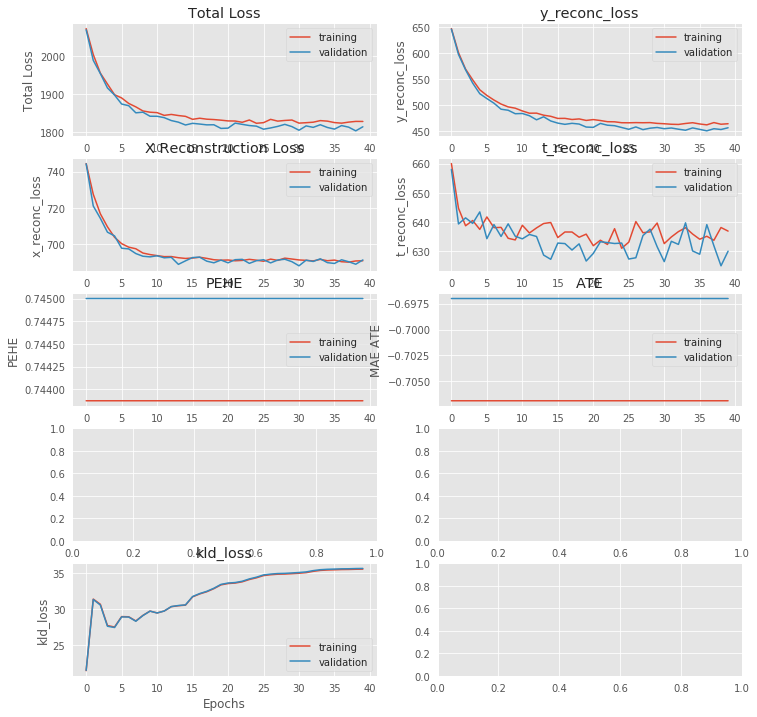

In [167]:
%autoreload 2
model = run_cevae(num_epochs=40, lr_start=0.01, lr_end=0.0001, train_loader=train_loader, test_loader=test_loader, 
          input_dim = 1, z_dim=1, z_mode='binary', x_mode='binary', device=device,
                 encoder_hidden_dim=3, decoder_hidden_dim=1, num_hidden=1)

In [ ]:
#z_sample = dist.Bernoulli(torch.Tensor([0.5])).sample((1000,))
z_sample = torch.randn(1000,1)
t = torch.ones((1000,))
with torch.no_grad():
    xloc, xscale, x_logits, t_logits,y_logits = model.decoder(z_sample,t)

In [ ]:
plt.plot(z_sample, torch.sigmoid(t_logits),'o')

In [ ]:
display(torch.sigmoid(x_logits)[:5])
display(torch.sigmoid(t_logits)[:5])
display(z_sample[:5])

In [168]:
%autoreload 2
zs, xs, ts, ys = model.decoder.sample(20000)

In [169]:
print("Marginal probs according to VAE and according to the data")
for t in range(2):
    for y in range(2):
        for x in range(2):
            probVAE = ((ts==t)&(ys==y)&(xs==x)).double().sum()/len(ts)
            probdata = len(df[(df.t==t)&(df.yf==y)&(df.x0==x)])/len(df)
            print("P(y={},x={},t={})\t={}(VAE)\t={}(data)".format(y,x,t,probVAE,probdata))
for t in range(2):
    for y in range(2):
        probVAE = ((ts==t)&(ys==y)).double().sum()/len(ts)
        probdata = len(df[(df.t==t)&(df.yf==y)])/len(df)
        print("P(y={},t={})\t={}(VAE)\t={}(data)".format(y,t,probVAE,probdata))

Marginal probs according to VAE and according to the data
P(y=0,x=0,t=0)	=0.25325(VAE)	=0.3056(data)
P(y=0,x=1,t=0)	=0.23625(VAE)	=0.1969(data)
P(y=1,x=0,t=0)	=0.0557(VAE)	=0.0769(data)
P(y=1,x=1,t=0)	=0.0557(VAE)	=0.0261(data)
P(y=0,x=0,t=1)	=0.05485(VAE)	=0.0123(data)
P(y=0,x=1,t=1)	=0.0559(VAE)	=0.0556(data)
P(y=1,x=0,t=1)	=0.1401(VAE)	=0.1038(data)
P(y=1,x=1,t=1)	=0.14825(VAE)	=0.2228(data)
P(y=0,t=0)	=0.4895(VAE)	=0.5025(data)
P(y=1,t=0)	=0.1114(VAE)	=0.103(data)
P(y=0,t=1)	=0.11075(VAE)	=0.0679(data)
P(y=1,t=1)	=0.28835(VAE)	=0.3266(data)


In [170]:
print("Conditional probs according to VAE and data")
for z in range(2):
    for t in range(2):
        probVAE = ((ts==t)&(zs==z)).double().sum()/(zs==z).double().sum()
        probdata = len(df[(df.t==t)&(df.z==z)])/len(df[df.z==z])
        print("P(t={}|z={})\t={:.3f}(VAE)\t{:.3f}(data)".format(t,z,probVAE, probdata))
print()
for z in range(2):
    for x in range(2):
        probVAE = ((xs==x)&(zs==z)).double().sum()/(xs==x).double().sum()
        probdata = len(df[(df.x0==x)&(df.z==z)])/len(df[df.z==z])
        print("P(x0={}|z={})\t={:.3f}(VAE)\t{:.3f}(data)".format(x,z,probVAE, probdata))

Conditional probs according to VAE and data
P(t=0|z=0)	=0.439(VAE)	0.405(data)
P(t=1|z=0)	=0.561(VAE)	0.595(data)
P(t=0|z=1)	=0.766(VAE)	0.808(data)
P(t=1|z=1)	=0.234(VAE)	0.192(data)

P(x0=0|z=0)	=0.467(VAE)	0.101(data)
P(x0=1|z=0)	=0.544(VAE)	0.899(data)
P(x0=0|z=1)	=0.533(VAE)	0.900(data)
P(x0=1|z=1)	=0.456(VAE)	0.100(data)


In [171]:
print(xs.mean())
df.x0.mean()

tensor(0.4961)


0.5014

In [172]:
e = torch.rand((20,1))
probs = torch.cat([torch.ones(10,1)*0.1, torch.ones(10,1)*0.9],axis=0)
z = torch.sigmoid(torch.log(e) - torch.log(1-e) + torch.log(probs) - torch.log(1-probs))

In [174]:
z

tensor([[0.1921],
        [0.3960],
        [0.0965],
        [0.3096],
        [0.0770],
        [0.0816],
        [0.1367],
        [0.0833],
        [0.0522],
        [0.1500],
        [0.5467],
        [0.2739],
        [0.8519],
        [0.8835],
        [0.8080],
        [0.9612],
        [0.9045],
        [0.1854],
        [0.3493],
        [0.3885]])

In [177]:
input_dim = 2
dummycombinations = 2**(input_dim+1)
for i in range(dummycombinations):
    t = i // (dummycombinations/2)
    x = [i%(dummycombinations/(2**k)) for k in range(1,input_dim+1)]
    print(t,x)

0.0 [0.0, 0.0]
0.0 [1.0, 1.0]
0.0 [2.0, 0.0]
0.0 [3.0, 1.0]
1.0 [0.0, 0.0]
1.0 [1.0, 1.0]
1.0 [2.0, 0.0]
1.0 [3.0, 1.0]


In [182]:
import itertools
[[int(k) for k in seq] for seq in itertools.product("01", repeat=3)]

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [199]:
a = (dist.Bernoulli(torch.Tensor([0.5])).sample((10,)) == 0).double()
a

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.]], dtype=torch.float64)

In [206]:
torch.prod(a,axis=1).unsqueeze(1)

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.]], dtype=torch.float64)

In [207]:
x_c = torch.Tensor(combs[i][1:])

NameError: name 'combs' is not defined

In [226]:
x = torch.cat([dist.Bernoulli(torch.Tensor([0.5])).sample([10]) for i in range(2)], 1)
x_c = torch.Tensor([0,1])
print(x)
print(x_c)
(x==x_c).double().prod(1).unsqueeze(1)

tensor([[0., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 0.],
        [1., 0.]])
tensor([0., 1.])


tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.]], dtype=torch.float64)